<a href="https://colab.research.google.com/github/hellokayas/Some-Programming-Samples/blob/master/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files 
uploaded = files.upload()

pull data from https://finance.yahoo.com/quote/AAP/history?p=AAP

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

ourdata = pd.read_csv("google.csv")

ourdata

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-11-17,2984.58,2992.52,2971.26,2981.24,2981.24,763400
1,2021-11-16,2983.41,2996.65,2967.00,2981.52,2981.52,862700
2,2021-11-15,3000.00,3009.54,2973.05,2987.76,2987.76,812400
3,2021-11-12,2956.63,2997.19,2929.08,2992.91,2992.91,852000
4,2021-11-11,2942.14,2970.04,2933.89,2934.96,2934.96,623200
...,...,...,...,...,...,...,...
95,2021-07-06,2588.99,2597.69,2568.18,2595.42,2595.42,1067500
96,2021-07-02,2536.79,2576.96,2535.38,2574.38,2574.38,1058000
97,2021-07-01,2497.00,2529.25,2497.00,2527.37,2527.37,856000
98,2021-06-30,2513.07,2516.00,2495.15,2506.32,2506.32,1200300


In [4]:
from fbprophet import Prophet

In [5]:
# use the FB prophet model for prediction which uses the autoregressive model, additive model
# Select only the important features i.e. the date and price
data = ourdata[["Date","Close*"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close*":"y"}) #renaming the columns of the dataset
data.head(5)
# Here, ds is the date and y is the Google Stock price.

,ds,y
0,2021-11-17,2981.24
1,2021-11-16,2981.52
2,2021-11-15,2987.76
3,2021-11-12,2992.91
4,2021-11-11,2934.96


In [6]:
# pip install fbprophet
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data
'''
You should see this after the fitting:
Optimization terminated normally:
Convergence detected: relative gradient magnitude is below tolerance
'''

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


'\nYou should see this after the fitting:\nOptimization terminated normally:\nConvergence detected: relative gradient magnitude is below tolerance\n'

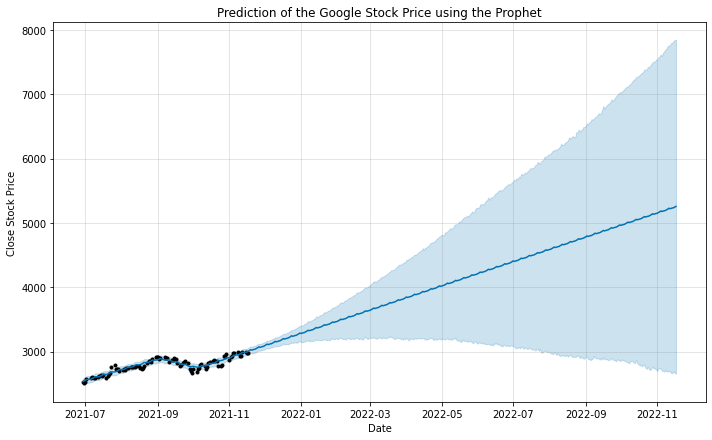

In [7]:
# plot the predictions
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
# The model used all the data for the training (black dots) and predicted the future stock price from June 2020 till June 2021 ! Blue shadow is the confidence interval.

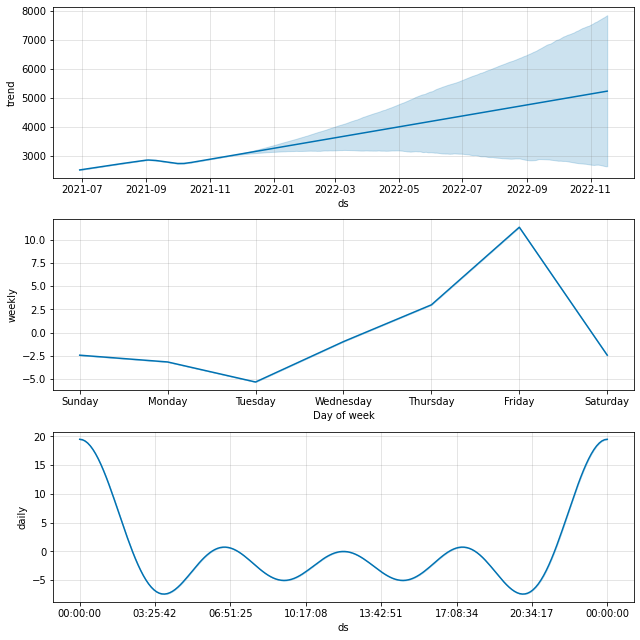

In [8]:
# Plot the trend, weekly, seasonally, yearly and daily components
m.plot_components(prediction)
plt.show()
